In [47]:
import pandas as pd
import numpy as np
import datetime as dt
import dateutil as du
%pylab inline
exec(open("/Users/raghuramkowdeed/Documents/afp/models/quintile_model.py").read())
exec(open("/Users/raghuramkowdeed/Documents/afp/get_signal_names.py").read())


Populating the interactive namespace from numpy and matplotlib


In [3]:
data = pd.read_csv('/Users/raghuramkowdeed/Desktop/rps_signals.csv')

In [53]:
col_names = [ x.lower() for x in data.columns]
data.columns = col_names

In [55]:
signal_data = data.set_index("date")

In [58]:
sig_names = get_signal_names()

In [59]:
signal_data_2 = signal_data[sig_names]

In [60]:
dates = np.unique( signal_data.index )

In [61]:
d1 = dates[281]

In [62]:
s1 = signal_data_2.loc[d1,:]

In [63]:
s1.shape

(4735, 100)

In [64]:
fil_names = np.where( s1.isnull().sum(axis=0)<500 )[0]


In [65]:
s2 = s1[fil_names]

In [67]:
s2.shape

(4735, 76)

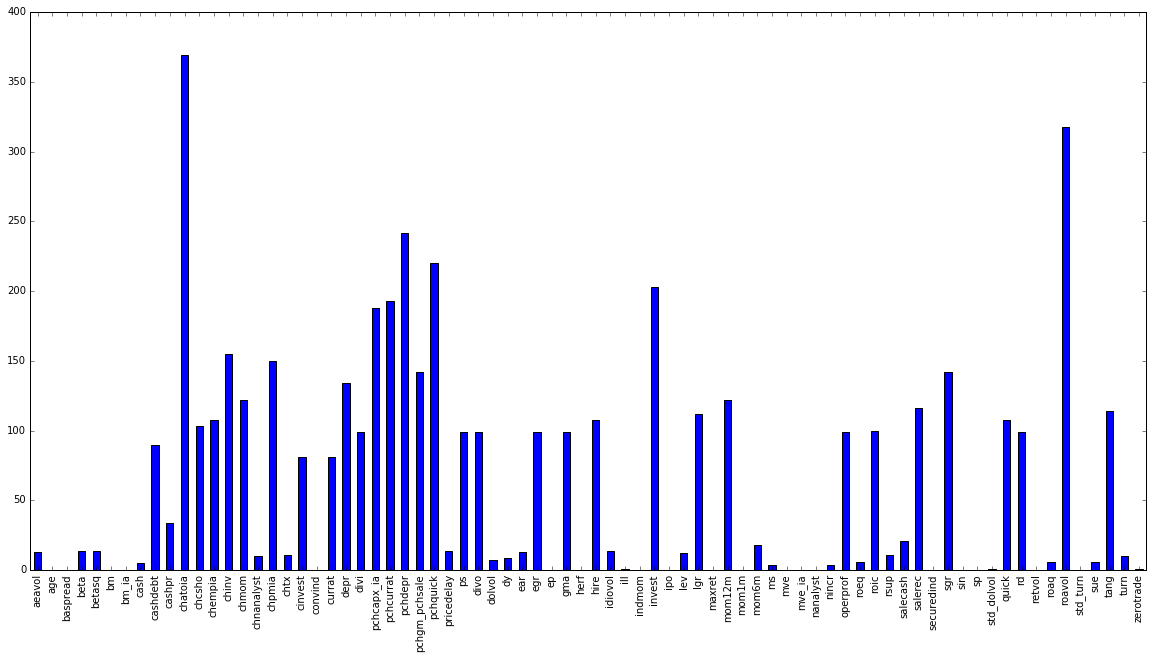

In [66]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

s2.isnull().sum(axis=0).plot(kind='bar')

In [19]:
data.iloc[['permno', 'DATE']]

TypeError: cannot perform reduce with flexible type

In [16]:
data.iloc[0:10,:]

,permno,gvkey,fyear,sic2,spi,mve_f,bm,ep,cashpr,dy,...,baspread,std_dolvol,std_turn,ill,zerotrade,BETA,betasq,rsq1,pricedelay,idiovol
0,10006,1010,1978,37,0.0000,269.308500,1.180962,0.153022,-32.218678,0.067347,...,0.014234,0.881844,0.635898,2.565667e-08,1.115306e-07,1.060404,1.124456,0.343403,0.029861,0.025576
1,10057,1098,1978,36,0.0000,97.372000,0.956692,0.135131,-4.408581,0.036982,...,0.022470,1.368363,2.546787,2.719812e-07,6.199128e-08,1.525993,2.328654,0.307902,0.092675,0.037473
2,10103,1012,1978,33,NaN,1.697500,3.362003,0.338144,-17.143817,0.000000,...,0.511667,NaN,NaN,NaN,NaN,1.759501,3.095842,0.096756,0.221852,0.087020
3,10137,1279,1978,49,NaN,537.524500,1.330341,0.153238,-87.819837,0.137560,...,0.020899,0.553246,0.740017,1.765620e-08,9.726790e-08,0.492885,0.242936,0.189697,0.125795,0.017540
4,10145,1300,1978,99,-0.0031,805.633282,1.579284,0.149248,-22.050470,0.070247,...,0.016947,0.427617,0.657563,2.898901e-09,6.190654e-08,1.139150,1.297663,0.279436,0.024234,0.031201
5,10146,1016,1978,35,NaN,7.994998,1.122452,0.237398,-6.368470,0.063915,...,0.086759,NaN,NaN,NaN,NaN,1.952736,3.813179,0.223190,-0.111067,0.061304
6,10153,1308,1978,13,0.0000,349.246793,1.664989,0.217683,-19.546307,0.053421,...,0.010843,0.678361,0.721832,1.324757e-08,9.379728e-08,1.241811,1.542095,0.341273,0.030504,0.029759
7,10154,1017,1978,38,0.0000,10.029370,1.166275,0.199215,-84.814294,0.000698,...,0.068065,NaN,NaN,NaN,NaN,2.010874,4.043614,0.155501,0.058613,0.078261
8,10161,1365,1978,33,0.0000,1613.429242,1.012985,0.099174,-7.595052,0.053278,...,0.020452,0.771007,0.550444,1.222656e-08,1.499570e-07,0.914781,0.836825,0.161795,-0.009727,0.036211
9,10189,1019,1978,73,0.0000,4.427000,0.630450,0.085159,-3.937341,0.046307,...,0.136939,NaN,NaN,NaN,NaN,0.190412,0.036257,-0.000905,1.046167,0.043385


In [20]:
price_df = data.set_index(['DATE','permno']).copy()
price_df = price_df.sort_index()
price_df = price_df.unstack(['permno'])

In [21]:
price_df.shape

(444, 2765084)

In [12]:
x = data[data['datadate']>20000101]

In [15]:
x[ x['datadate'] == 20000131 ]

,permno,gvkey,fyear,sic2,spi,mve_f,bm,ep,cashpr,dy,...,baspread,std_dolvol,std_turn,ill,zerotrade,BETA,betasq,rsq1,pricedelay,idiovol
1192699,10025,11903,1999,30,-0.0033,236.736000,0.282331,0.018894,0.940058,0.000000,...,0.065425,1.138115,2.647828,2.204229e-07,4.321633e-08,0.600897,0.361077,0.038878,0.404764,0.067624
1192715,10089,12143,1999,34,0.0000,34.055937,0.543283,0.121976,16.852931,0.000000,...,0.084135,0.865495,19.768777,2.963056e-08,4.076781e-09,1.138636,1.296491,0.083704,0.165922,0.089605
1192735,10155,12094,1999,33,0.0000,10.428750,0.754836,-0.460554,-0.595915,0.006041,...,0.093886,0.892353,2.017109,5.864978e-06,9.545455e-01,0.833803,0.695228,0.002876,1.231604,0.214526
1192740,10182,12171,1998,50,0.0052,1603.199750,0.603347,0.080434,-224.406994,0.000000,...,0.050790,0.450754,7.061477,1.288148e-09,7.158415e-09,1.116623,1.246847,0.085822,0.037641,0.086680
1192756,10256,12226,1999,73,-0.0925,10.461000,0.268043,-0.448619,1.178102,0.000000,...,0.060201,1.204169,1.203388,4.156362e-06,8.638855e-08,1.801291,3.244651,0.030026,-0.577270,0.232763
1192759,10259,12234,1998,36,0.0000,75.727969,0.306822,-0.001994,1.759994,0.033528,...,0.070797,0.684088,3.827929,1.371399e-07,1.658095e-08,1.967248,3.870064,0.123857,-0.022805,0.127301
1192772,10325,13292,1998,56,-0.0102,83.510937,0.936201,0.024356,-17.923638,0.010083,...,0.043892,1.315693,18.718176,2.257839e-07,1.631988e-08,1.506235,2.268744,0.140562,0.080733,0.090306
1192794,10423,12346,1998,57,0.0000,16.336250,0.982967,0.043278,-27.517160,0.000000,...,0.060282,1.380409,5.110976,4.936147e-07,2.076941e-08,1.286311,1.654597,0.046677,-0.032422,0.135472
1192803,10501,12379,1998,24,0.0000,304.766000,0.257040,0.057451,12.396188,0.003872,...,0.065440,0.902619,4.784874,1.236272e-07,2.973816e-08,0.702031,0.492847,0.061259,-0.246502,0.065438
1192805,10514,12421,1998,57,0.0012,482.870750,0.439006,0.084105,0.543289,0.000000,...,0.031833,1.053244,4.847311,1.295004e-08,1.719930e-08,0.829683,0.688373,0.051332,-0.259531,0.083948


In [63]:
names = data.columns.sort_values()
#names = [ x.lower() for x in names]

for name in names :
    print name

BETA
DATE
DLRET
DLSTCD
EXCHCD
IPO
MEANEST
MEANREC
RET
SHROUT
VOL
absacc
acc
aeavol
age
agr
baspread
betasq
bm
bm_ia
cash
cashdebt
cashpr
cf
cfp
cfp_ia
chadv
chato
chatoia
chcsho
chdrc
chempia
chfeps
chinv
chmom
chnanalyst
chobklg
chpm
chpmia
chrec
chtx
cinvest
conv
convind
count
credrat
credrat_dwn
currat
datadate
depr
disp
divi
divo
dolvol
dy
eamonth
ear
egr
ep
ewret
fgr5yr
fyear
gma
grGW
grcapx
grltnoa
gvkey
herf
hire
i
idiovol
ill
indmom
invest
j
lev
lgr
ltg
maxret
mom12m
mom1m
mom36m
mom6m
ms
mve
mve_f
mve_ia
mve_m
nanalyst
nincr
obklg
operprof
orgcap
pchcapx
pchcapx_ia
pchcurrat
pchdepr
pchgm_pchsale
pchquick
pchsale_pchinvt
pchsale_pchrect
pchsale_pchxsga
pchsaleinv
pctacc
permno
pps
prc
prccq
pricedelay
ps
quick
rd
rd_mve
rd_sale
rdbias
rdq
realestate
retcons_neg
retcons_pos
retvol
roaq
roavol
roe
roeq
roic
rsq1
rsup
salecash
saleinv
salerec
secured
securedind
sfe
sgr
sgrvol
sic2
sin
sp
spi
spii
std_dolvol
std_turn
stdacc
stdcf
sue
tang
tb
turn
woGW
zerotrade


In [55]:
start_year = 1995
start_date = dt.datetime.strptime(str(start_year)+'0101','%Y%m%d')
end_year = 2015
end_date = dt.datetime.strptime(str(end_year)+'0101','%Y%m%d')

In [56]:
rebalance_dates = []
curr_date = start_date
while curr_date <= end_date :
    rebalance_dates.append(curr_date)
    curr_date = curr_date +  du.relativedelta.relativedelta(years=1)




In [57]:
l_ic_vec = []
nl_ic_vec = []
comb_ic_vec = []
nl_l_corr_vec = []
model_vec = []

In [58]:
look_back = 5
sig_name = 'mom12m'
num_buckets = 10


In [59]:
for r_d in rebalance_dates :
    train_end_date = r_d - du.relativedelta.relativedelta(years=1) 
    train_end_year = train_end_date.year
    
    train_start_date = train_end_date - du.relativedelta.relativedelta(years=look_back)
    train_start_year = train_start_date.year
    
    curr_year = r_d.year
    
    train_data = data
    train_data = train_data[train_data['fyear']>=train_start_year]
    train_data = train_data[train_data['fyear']<=train_end_year]
    
    test_data = data
    test_data = test_data[test_data['fyear']==curr_year]

    
    model = QuintileSort(num_buckets,'median')

    train_x = train_data[sig_name]
    train_y = train_data['RET']

    model.fit(train_x,train_y)

    #model.ret_profile.plot(kind='bar')

    test_x = test_data[sig_name]
    test_y = test_data['RET']

    nl_pred_ret = model.predict(test_x)
    nl_pred_ret = nl_pred_ret/nl_pred_ret.std()
    
    nl_corr = nl_pred_ret.corr(test_y)
    
    beta = train_x.corr(train_y) * train_y.std() / train_x.std()
    l_pred_ret = test_x*beta
    l_pred_ret = l_pred_ret/l_pred_ret.std()
    
    l_corr = l_pred_ret.corr(test_y)

    comb_pred_ret = ( nl_pred_ret + l_pred_ret )/2.0
    comb_corr = comb_pred_ret.corr(test_y)
    
    
    nl_l_corr = nl_pred_ret.corr(l_pred_ret)
    
    
    l_ic_vec.append(l_corr)
    nl_ic_vec.append(nl_corr)
    
    comb_ic_vec.append(comb_corr)
    
    nl_l_corr_vec.append(nl_l_corr)
    
    model_vec.append(model)
    
    
    print( r_d,l_corr, nl_corr )
    
df = pd.DataFrame()
df['l_corr'] = l_ic_vec
df['nl_corr'] = nl_ic_vec
df['comb_ic'] = comb_ic_vec
df['nl_l_corr'] = nl_l_corr_vec

df.index = rebalance_dates

(datetime.datetime(1995, 1, 1, 0, 0), -0.01727188572880937, 0.009733259842092608)
(datetime.datetime(1996, 1, 1, 0, 0), -0.005246680568309036, 0.01194277051300968)
(datetime.datetime(1997, 1, 1, 0, 0), 0.01073992317707247, -0.0018366417180636445)
(datetime.datetime(1998, 1, 1, 0, 0), 0.0408410639335772, -0.0277578382329527)
(datetime.datetime(1999, 1, 1, 0, 0), -0.008456135835622871, 0.028272816251032406)
(datetime.datetime(2000, 1, 1, 0, 0), -0.017490601411599225, 0.017874237596176568)
(datetime.datetime(2001, 1, 1, 0, 0), 0.03334028352097386, -0.02760339010819175)
(datetime.datetime(2002, 1, 1, 0, 0), 0.024003955706989447, -0.023266432189109284)
(datetime.datetime(2003, 1, 1, 0, 0), -0.018532547941750882, 0.021065238508514248)
(datetime.datetime(2004, 1, 1, 0, 0), -0.010282931903837415, 0.005782698513520024)
(datetime.datetime(2005, 1, 1, 0, 0), 0.006464711675858624, 0.011551615916152514)
(datetime.datetime(2006, 1, 1, 0, 0), -0.012781952999013574, 0.025818141548479317)
(datetime.dat

In [60]:
df

,l_corr,nl_corr,comb_ic,nl_l_corr
1995-01-01,-0.017272,0.009733,-0.005497,-0.032868
1996-01-01,-0.005247,0.011943,0.004794,-0.044522
1997-01-01,0.010740,-0.001837,0.006063,-0.056673
1998-01-01,0.040841,-0.027758,0.011204,-0.300410
1999-01-01,-0.008456,0.028273,0.014990,-0.123963
2000-01-01,-0.017491,0.017874,0.002164,-0.341548
2001-01-01,0.033340,-0.027603,0.005572,-0.495887
2002-01-01,0.024004,-0.023266,0.000657,-0.416457
2003-01-01,-0.018533,0.021065,0.002030,-0.216789
2004-01-01,-0.010283,0.005783,-0.003857,-0.307785


In [61]:
df.mean()

l_corr       0.002257
nl_corr      0.006229
comb_ic      0.006908
nl_l_corr   -0.216662
dtype: float64

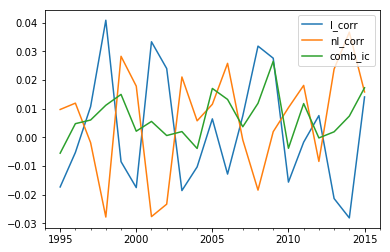

In [62]:
df[ ['l_corr', 'nl_corr', 'comb_ic']].plot()